In [0]:
import cv2, time
video=cv2.VideoCapture(0)

In [0]:
#Function for capturing images from webcam to colab(reference needed)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='test.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to test.jpg


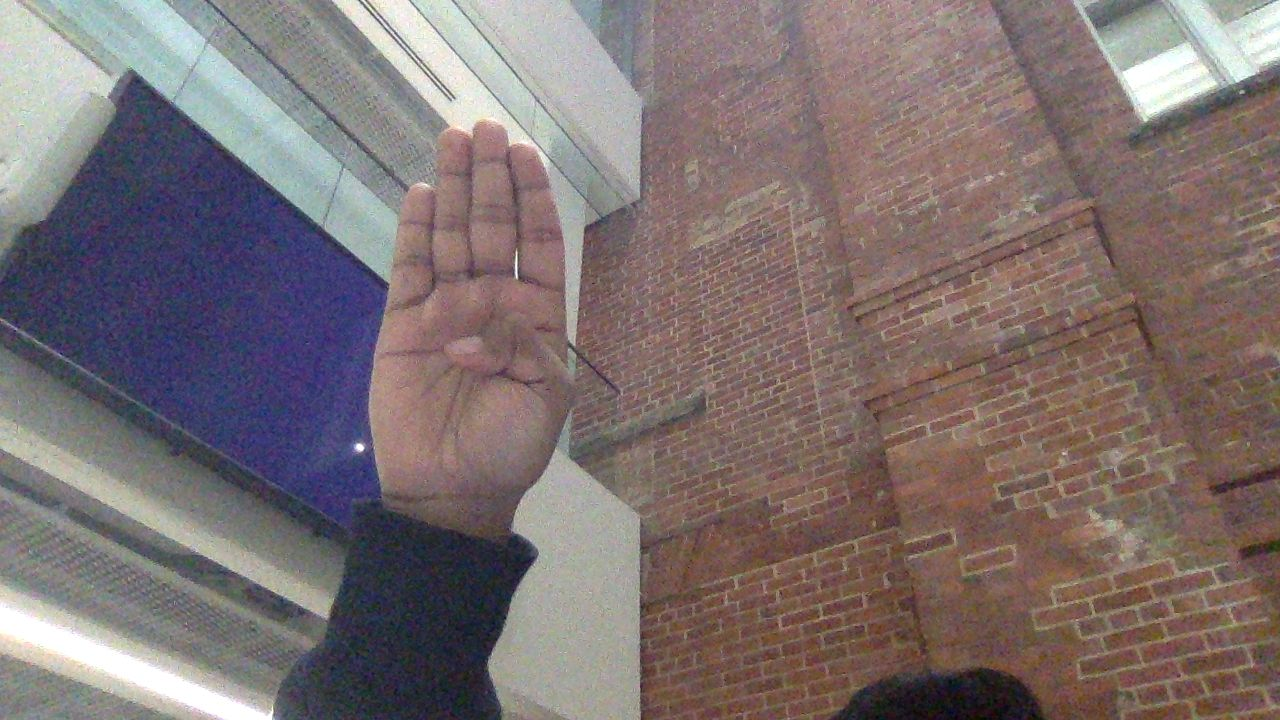

In [0]:
#Utilize the function 
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [0]:
#Upload the model
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
import cv2
import tensorflow as tf
import numpy as np


CATEGORIES = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

def process_img(filepath):
  IMG_SIZE=80
  img_array=cv2.imread(filepath)
  new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
  return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

model=tf.keras.models.load_model("3-conv-32-nodes-0-dense1571769509")
prediction =model.predict([process_img('test.jpg')])

pred_name = CATEGORIES[np.argmax(prediction)]
print(pred_name)

V


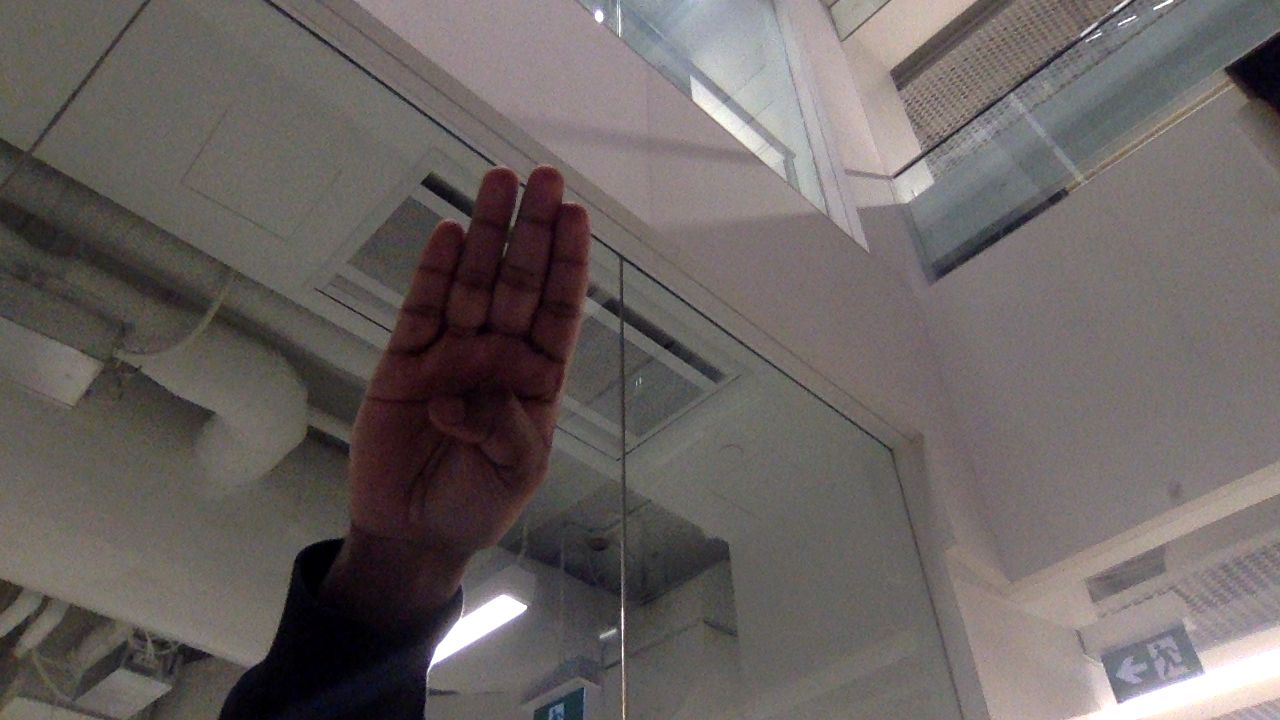

In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread('test.jpg')
cv2_imshow(img)